In [1]:
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
##unpacking the dataset into train and test datasets
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

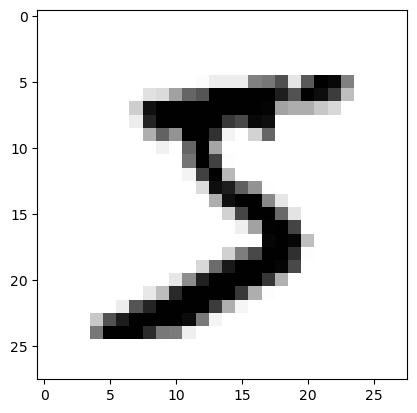

In [5]:
##just check the graph, how data looks like
import matplotlib.pyplot as plt
plt.show() ##in order to execute the graph
##however we dont know whether its color image or binary image
##so in order to plot it change the configuration
plt.imshow(x_train[0], cmap = plt.cm.binary)

In [6]:
print (x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

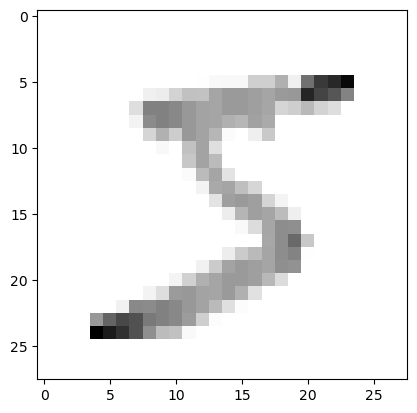

In [7]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)
plt.imshow(x_train[0], cmap = plt.cm.binary)

In [8]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [9]:
print(y_train[0])

5


In [10]:
import numpy as np
IMG_SIZE = 28
x_trainr= np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
x_testr= np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print("Training samples dimension", x_trainr.shape)
print("Testing samples dimension", x_testr.shape)

Training samples dimension (60000, 28, 28, 1)
Testing samples dimension (10000, 28, 28, 1)


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [12]:
#### Creating a neural network now
model = Sequential()

##### First Convolution Layer
model.add(Conv2D(64,(3,3), input_shape = x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

##### 2nd Convolution Layer
model.add(Conv2D(64,(3,3), input_shape = x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

##### 3rd Convolution Layer
model.add(Conv2D(64,(3,3), input_shape = x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

##### Fully Connected Layer #1
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

##### Fully Connected Layer #2
model.add(Dense(32))
model.add(Activation("relu"))

##### Last Fully Connected Layer
model.add(Dense(10))
model.add(Activation("softmax"))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [15]:
print("Total Training Samples = ",len(x_trainr))

Total Training Samples =  60000


In [16]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics=['accuracy'])

In [17]:
model.fit(x_trainr,y_train,epochs=5, validation_split = 0.3)

Epoch 1/5
1313/1313 [==============================] - 44s 31ms/step - loss: 0.3311 - accuracy: 0.8957 - val_loss: 0.1619 - val_accuracy: 0.9503
Epoch 2/5
1313/1313 [==============================] - 46s 35ms/step - loss: 0.1021 - accuracy: 0.9687 - val_loss: 0.0971 - val_accuracy: 0.9712
Epoch 3/5
1313/1313 [==============================] - 43s 33ms/step - loss: 0.0729 - accuracy: 0.9773 - val_loss: 0.0745 - val_accuracy: 0.9771
Epoch 4/5
1313/1313 [==============================] - 43s 33ms/step - loss: 0.0565 - accuracy: 0.9826 - val_loss: 0.0594 - val_accuracy: 0.9819
Epoch 5/5
1313/1313 [==============================] - 43s 33ms/step - loss: 0.0476 - accuracy: 0.9849 - val_loss: 0.0593 - val_accuracy: 0.9823


In [18]:
test_loss, test_acc = model.evaluate(x_testr, y_test)
print("Test Loss on 10,000 test samples", test_loss)
print("Validation Accuracy on 10,000 test samples", test_acc)

313/313 [==============================] - 3s 9ms/step - loss: 0.0551 - accuracy: 0.9835
Test Loss on 10,000 test samples 0.055066242814064026
Validation Accuracy on 10,000 test samples 0.9835000038146973


In [19]:
predicions = model.predict([x_testr])

313/313 [==============================] - 3s 9ms/step


In [20]:
print(predicions)

[[2.82380512e-07 3.57419731e-06 8.18257558e-06 ... 9.99928594e-01
  2.51770274e-07 2.51136262e-05]
 [2.34864230e-04 7.09833785e-07 9.99734461e-01 ... 1.04050446e-06
  6.07876973e-06 1.84299207e-08]
 [1.55745261e-06 9.99850631e-01 1.46793618e-05 ... 3.37412057e-05
  1.11515055e-05 7.98272049e-06]
 ...
 [4.18328554e-08 1.16191741e-05 9.21600758e-07 ... 1.12069738e-05
  3.54540389e-05 6.60628793e-05]
 [4.02542973e-05 6.42799702e-10 2.47205971e-08 ... 3.95182298e-07
  3.64412344e-03 5.00737369e-05]
 [1.00701864e-05 1.55517668e-07 1.51517888e-04 ... 2.84860380e-09
  5.60553672e-05 1.89126956e-06]]


In [21]:
print(np.argmax(predicions[0]))

7


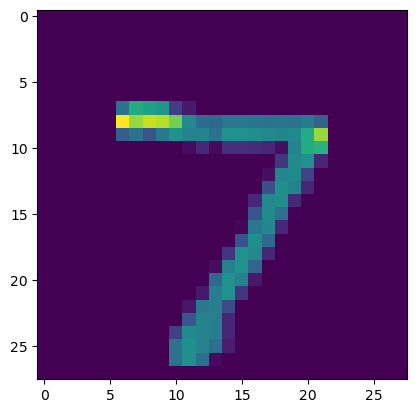

In [22]:
plt.imshow(x_test[0])

In [23]:
print(np.argmax(predicions[128]))

8


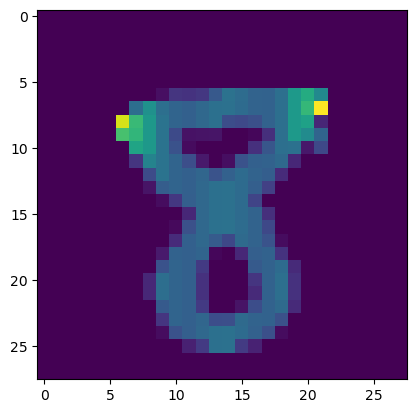

In [24]:
plt.imshow(x_test[128])

In [25]:
import cv2 

In [26]:
img = cv2.imread('eight.png')

TypeError: Image data of dtype object cannot be converted to float

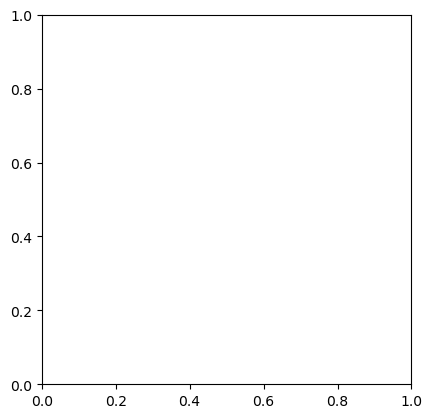

In [27]:
plt.imshow(img)